In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: kaggle.json: No such file or directory


In [2]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip sms-spam-collection-dataset.zip -d .

Archive:  sms-spam-collection-dataset.zip
replace ./spam.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [5]:
import pandas as pd
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
data = data.dropna(axis=1)

In [9]:
data.columns = ['label', 'feature']
data.head()

,label,feature
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
from sklearn.model_selection import train_test_split

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
vectorizer = CountVectorizer()

In [19]:
X_train_vect = vectorizer.fit_transform(X_train['feature'])
X_test_vect = vectorizer.transform(X_test['feature'])

In [20]:
classifier = MultinomialNB()
classifier.fit(X_train_vect,y_train)

MultinomialNB()

In [21]:
# prediction 
y_pred = classifier.predict(X_test_vect)

accuracy = accuracy_score(y_test,y_pred)
print("accuracy: ",accuracy)

cm = confusion_matrix(y_test,y_pred)
print("confusion matrix: ",cm)

cr = classification_report(y_test,y_pred)
print("classfication report: ", cr)

accuracy:  0.9838565022421525
confusion matrix:  [[963   2]
 [ 16 134]]
classfication report:                precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



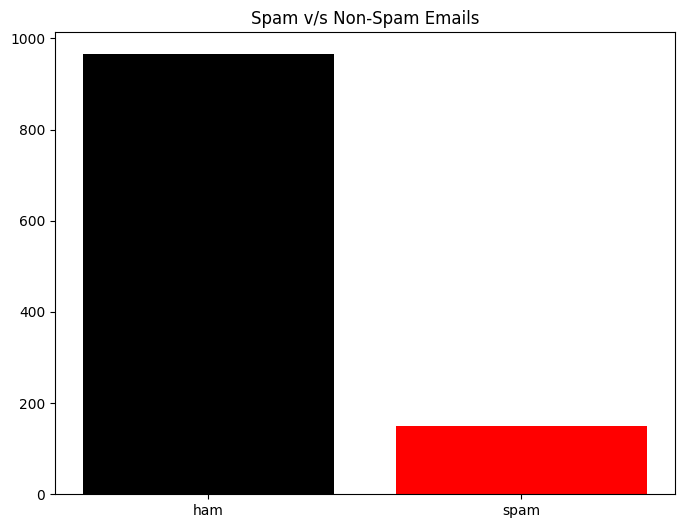

In [23]:
import matplotlib.pyplot as plt

spam_counts = y_test.value_counts()

plt.figure(figsize=(8,6))
plt.bar(spam_counts.index,spam_counts.values,color=['black', 'red'])
plt.title('Spam v/s Non-Spam Emails')
plt.xticks([0,1],['ham','spam'])
plt.show()